In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, classification_report, mean_absolute_error
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')                     

In [64]:
data=pd.read_csv("Customer_churn.csv")

In [65]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
data.shape

(7043, 21)

In [67]:
data.size


147903

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [70]:
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [71]:
data.duplicated().sum()

0

In [72]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
#1.Extract the 5th column & store it in ‘customer_5’


customer_5 = data.iloc[:,4]
customer_5.sample(2)


6793    Yes
2567     No
Name: Dependents, dtype: object

In [75]:
#2.Extract the 15th column & store it in ‘customer_15’

customer_15r = data.iloc[:, 14]
customer_15r .sample(2)

1871                    Yes
4498    No internet service
Name: StreamingMovies, dtype: object

#to check the Index of columns
pp = list(data.columns)
for x,y in enumerate(pp):
    print(x,y)

In [76]:
#Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [77]:
senior_male_electronics = data[(data['gender'] == 'Male') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Electronic check')]
senior_male_electronics.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5732,1580-BMCMR,Male,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,87.30,1637.3,No
5841,7136-RVDTZ,Male,1,No,No,70,No,No phone service,DSL,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,45.25,3264.45,Yes
6509,0616-ATFGB,Male,1,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.05,25.05,Yes


In [78]:
#Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [79]:
customer_total_tenure = data[(data['tenure']> 70) | (data['MonthlyCharges']>100)]
customer_total_tenure.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6859,3508-CFVZL,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.9,No
5190,3001-UNBTL,Male,1,Yes,Yes,29,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.95,2964.8,No


In [80]:
#Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’


In [81]:
two_mail_yes = data[(data['Contract'] == 'Two year') & (data['PaymentMethod'] == 'Mailed check') & (data['Churn'] == 'Yes')]
two_mail_yes.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [82]:
#Extract 333 random records from the customer_churn dataframe& store the result in ‘customer_333’


In [83]:
customer_333= data.sample(333)
customer_333.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
145,5716-EZXZN,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),99.05,6416.7,No
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
6818,2710-WYVXG,Female,0,No,No,3,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,71.10,213.35,No
6750,2144-ESWKO,Male,0,No,No,43,No,No phone service,DSL,Yes,...,Yes,No,No,No,One year,Yes,Credit card (automatic),35.20,1463.7,No
6616,9600-NAXZN,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,4528,Yes


In [84]:
#7. Get the count of different levels from the ‘Churn’ column


In [85]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [86]:
#1. Build a bar-plot for the ’InternetService’ column:
#Set x-axis label to ‘Categories of Internet Service’
#Set y-axis label to ‘Count of Categories’
#Set the title of plot to be ‘Distribution of Internet Service’
#Set the color of the bars to be ‘orange’
#Build a histogram for the ‘tenure’ column

TypeError: 'str' object is not callable

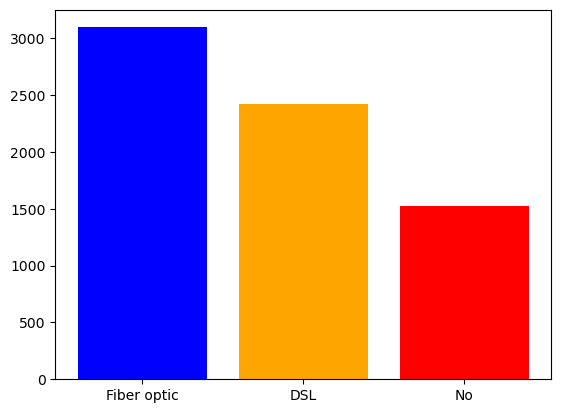

In [87]:
x = data.InternetService.value_counts().index
y = data.InternetService.value_counts()
     

plt.bar(x,y, color = ['blue', 'orange', 'red'])
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.show()
plt.tight_layout();

In [ ]:
#2.Build a histogram for the ‘tenure’ column:
#Set the number of bins to be 30
#Set the color of the bins to be ‘green’
#Assign the title ‘Distribution of tenure’


In [ ]:
plt.title('Distribution of tenure')
plt.hist(data.tenure, bins = 30, color = 'green')
plt.tight_layout();

In [ ]:
#3. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
#Assign the points a color of ‘brown’
#Set the x-axis label to ‘Tenure of customer’
#Set the y-axis label to ‘Monthly Charges of customer’
#Set the title to ‘Tenure vs Monthly Charges’

In [ ]:
plt.title = 'Tenure vs Monthly Charges'
sns.scatterplot(y = 'MonthlyCharges', x = 'tenure', data = data, color = 'brown')
plt.xlabel = 'Tenure of customer'
plt.ylabel = 'Monthly Charges of customer'
plt.tight_layout()
plt.show();

In [ ]:
data.boxplot('tenure',by=['Contract'])
plt.tight_layout()

In [ ]:
#4.Build a box-plot between ‘tenure’ & ‘Contract’.
#Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

In [ ]:
sns.boxplot(x = 'Contract' , y = 'tenure', data = data)
plt.tight_layout();
     

In [ ]:

# We can play around with Boxplot

data.boxplot(column = 'tenure', by='Contract', figsize = (6,6));

In [ ]:
#Linear Regression:
#Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

In [ ]:
#Divide the dataset into train and test sets in 70:30 ratio.
#Build the model on train set and predict the values on test set
#After predicting the values, find the root mean square error
#Find out the error in prediction & store the result in ‘error’
#Find the root mean square error


In [ ]:
#Please Note to convert 1D Array into 2D use double Square Brackets

y = data[['MonthlyCharges']]
X = data[['tenure']]
     

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 0)

In [ ]:
LR= LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

In [ ]:
Predictions = LR.predict(X_test)

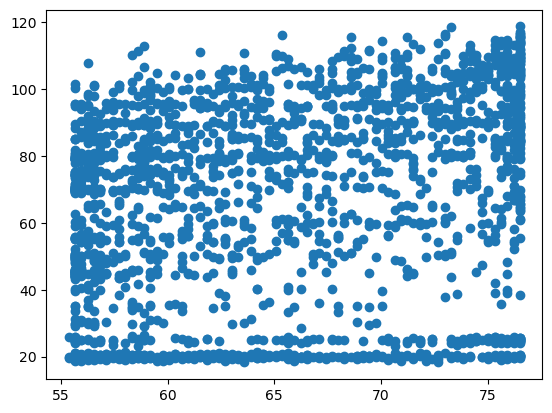

In [88]:
plt.scatter(Predictions, y_test)

In [90]:
LR.intercept_

array([55.37598517])

In [94]:
LR.coef_

array([[0.29341636]])

In [96]:
MAE = mean_absolute_error(y_test,Predictions)
MAE

25.651705933984932

In [97]:
Variance = mean_squared_error(y_test, Predictions)  #less MSE = Good Model | 0 MSE = Perfect Model
Variance



864.0415701364655

In [98]:
Standard_Deviation = np.sqrt(mean_squared_error(y_test, Predictions))
Standard_Deviation

29.394584027273893

In [99]:
#r2 score = How much predicted scores match actual data points

In [100]:
r2_score(y_test, Predictions) #Goodness of Fit is preffered for Multiple linear regression

#Accuracy score is used for Logistic Regression

0.069470028128085

In [101]:
#OLS Method
#Useful Method for Logistic Regression with Muti Independent Variables

In [102]:
import statsmodels.api as sm

In [103]:
X = sm.OLS(y_train, X_train).fit()
X.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         MonthlyCharges   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              7916.
Date:                Wed, 21 May 2025   Prob (F-statistic):                        0.00
Time:                        20:29:59   Log-Likelihood:                         -25681.
No. Observations:                4930   AIC:                                  5.136e+04
Df Residuals:                    4929   BIC:                                  5.137e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tenure         1.3808      0.016     88.970      0.000       1.350       1.411
==============================================================================
Omnibus:                      139.403   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.212
Skew:                          -0.362   Prob(JB):                     1.18e-29
Kurtosis:                       2.646   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#Logistic Regression

In [105]:
#a. A. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

#Dividethe dataset in 65:35 ratio
#Build the model on train set and predict the values on test set
#Build the confusion matrix and get the accuracy score

In [106]:
y = data[['Churn']]
x = data[['MonthlyCharges']]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state=0)
     

In [109]:
LM = LogisticRegression()
LM.fit(x_train, y_train)

LogisticRegression()

In [111]:

predictions = LM.predict(x_test)

In [112]:
classification_report(predictions, y_test) #Gives report of Accuracy, Precision, Recall, F1-Score

'              precision    recall  f1-score   support\n\n          No       1.00      0.74      0.85      2466\n         Yes       0.00      0.00      0.00         0\n\n    accuracy                           0.74      2466\n   macro avg       0.50      0.37      0.42      2466\nweighted avg       1.00      0.74      0.85      2466\n'

In [113]:

confusion_matrix(predictions, y_test)

array([[1815,  651],
       [   0,    0]], dtype=int64)

In [114]:

accuracy_score(predictions, y_test)

0.7360097323600974

In [116]:
#B. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

#Divide the dataset in 80:20 ratio
#Build the model on train set and predict the values on test set
#Build the confusion matrix and get the accuracy score
#Data Split
    

In [118]:
y = data[['Churn']]
x = data[['MonthlyCharges', 'tenure']]

In [119]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=0)
     

In [124]:
LM= LogisticRegression()
LM.fit(x_train, y_train)


LogisticRegression()

In [125]:
predictions= LM.predict(x_test)

In [126]:
accuracy_score(predictions,y_test)

0.7735982966643009

In [127]:

confusion_matrix(predictions,y_test)

array([[934, 212],
       [107, 156]], dtype=int64)

In [128]:

classification_report(predictions,y_test)

'              precision    recall  f1-score   support\n\n          No       0.90      0.82      0.85      1146\n         Yes       0.42      0.59      0.49       263\n\n    accuracy                           0.77      1409\n   macro avg       0.66      0.70      0.67      1409\nweighted avg       0.81      0.77      0.79      1409\n'